# **CAMPUS PLACEMENT PREDICTIONS**


**ABSTRACT:**

In today's competitive job market, predicting campus placements accurately is crucial for both students and educational institutions. Leveraging the power of data science and machine learning, our Streamlit application aims to provide insights into the likelihood of a student being placed based on various criteria.

Our application utilizes a dataset comprising 15 columns, including academic performance metrics, personal information, and other relevant factors. Through exploratory data analysis and predictive modeling techniques, we seek to uncover patterns and trends that influence placement outcomes.

# **EXPLORATORY DATA ANALYSIS**

**The below cell calls all the universal imports used in the project**

(Numpy, Pandas, Matplotlib and Seaborn).

By importing these libraries, we gain access to their functionalities, which can be used for various data analysis, manipulation, and visualization tasks in Python.

In [ ]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

**Reading the dataset from Github as dataframe object "df" and displaying the first and last 5 records**

In [ ]:
# Reading the dataset
df = pd.read_csv('https://raw.githubusercontent.com/karthiks061992/campus-placements/main/Placement_Data_Full_Class.csv')


In [ ]:
# Displaying the first 5 rows of the dataset
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [ ]:
# Displaying the last 5 rows of the dataset
df.tail()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
214,215,M,62.00,Central,58.00,Others,Science,53.00,Comm&Mgmt,No,89.0,Mkt&HR,60.22,Not Placed,NaN
215,5,M,0.00,Others,0.00,Others,Commerce,0.00,Comm&Mgmt,No,0.0,Mkt&Fin,0.00,Not Placed,0.0
216,5,M,0.00,Others,0.00,Others,Commerce,0.00,Comm&Mgmt,No,0.0,Mkt&Fin,0.00,Not Placed,0.0
217,5,M,23.29,Others,26.98,Others,Commerce,13.77,Comm&Mgmt,No,0.0,Mkt&Fin,0.00,Not Placed,0.0
218,5,M,0.00,Others,0.00,Others,Commerce,0.00,Comm&Mgmt,No,0.0,Mkt&Fin,0.00,Placed,0.0


**Generating descriptive statistics of the DataFrame.These statistics include count, mean, standard deviation, minimum, quartiles, and maximum values.**

In [ ]:
# Describing the dataset
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,152.000000
mean,106.118721,66.180457,65.244795,65.220822,70.783653,61.140685,281059.210526
std,63.167206,13.602674,13.529316,11.186659,16.329728,10.162216,103208.734265
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.500000,60.000000,60.165000,61.000000,60.000000,57.670000,240000.000000
50%,106.000000,67.000000,65.000000,65.600000,70.000000,61.870000,262000.000000
75%,160.500000,75.300000,73.000000,72.000000,83.000000,66.145000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


**Checking for null values in the dataset**

In [ ]:
# Checking null values
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64


 We can see that the null values occur for salary

**Checking the number of unique values for all of the object datatypes**

In [ ]:
#Checking the number of unique values
df.select_dtypes(include='object').nunique()

gender            2
ssc_b             2
hsc_b             2
hsc_s             3
degree_t          3
workex            2
specialisation    2
status            2
dtype: int64

**Dropping the column "sl_no" since it has no impact on our model and
displaying the first and last 5 rows after removing the "sl_no" column**

In [ ]:
# Dropping the column "sl_no"
df.drop(columns='sl_no', inplace=True)


In [ ]:
# Displaying the first 5 rows of the dataset
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [ ]:
# Displaying the last 5 rows of the dataset
df.tail()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
214,M,62.00,Central,58.00,Others,Science,53.00,Comm&Mgmt,No,89.0,Mkt&HR,60.22,Not Placed,NaN
215,M,0.00,Others,0.00,Others,Commerce,0.00,Comm&Mgmt,No,0.0,Mkt&Fin,0.00,Not Placed,0.0
216,M,0.00,Others,0.00,Others,Commerce,0.00,Comm&Mgmt,No,0.0,Mkt&Fin,0.00,Not Placed,0.0
217,M,23.29,Others,26.98,Others,Commerce,13.77,Comm&Mgmt,No,0.0,Mkt&Fin,0.00,Not Placed,0.0
218,M,0.00,Others,0.00,Others,Commerce,0.00,Comm&Mgmt,No,0.0,Mkt&Fin,0.00,Placed,0.0


**Checking for missing values**



In [ ]:
# Checking for missing value
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

salary    30.593607
dtype: float64

We can see that salary column has missing values

**Imputing "salary" column with median since outliers are more**


In [ ]:
# Filling null value in 'salary' column with median
df['salary'] = df['salary'].fillna(df['salary'].mean())
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.000000
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.000000
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.000000
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,281059.210526
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.000000


**Checking if all the salary null values have been operated**

In [ ]:
#Checking for missing values
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Series([], dtype: float64)

**Plotting a heatmap:**


**WHAT IS A HEATMAP?:**

* A heatmap is a graphical representation of data where values in a matrix are represented as colors. It's a way of visualizing data in a two-dimensional form, where the values of the matrix are represented by colors and can be easily interpreted at a glance.

**WHY IS A HEATMAP USED?:**
* ***For Identifying Patterns:*** Heatmaps are used to identify patterns, trends, and correlations in data, especially when dealing with large datasets or matrices. They provide a visual summary of complex data that is easy to interpret.

* ***For Comparing Data:*** Heatmaps allow for quick comparison of different categories or variables across rows and columns of the matrix. This is useful for spotting similarities or differences in data.

* ***To Highlight Relationships:*** Heatmaps are effective at highlighting relationships between variables. They can reveal clusters or groups within the data, as well as show the strength of relationships through variations in color intensity.

* ***For Data Exploration:*** Heatmaps are valuable for exploratory data analysis. They help in understanding the structure of the data, identifying outliers, and discovering unexpected patterns.

**HOW TO DRAW OBSERVATIONS FROM A HEATMAP?:**

* ***Color Intensity:*** The intensity of colors in a heatmap represents the magnitude of the values. Darker colors typically indicate higher values, while lighter colors represent lower values. By examining the color gradient, you can quickly identify regions of interest or outliers.

* ***Patterns and Clusters:*** Look for patterns or clusters of similar colors in the heatmap. These clusters may indicate groups or categories within the data that share common characteristics or exhibit similar behavior.

* ***Correlations:*** Heatmaps are often used to visualize correlations between variables. Focus on areas of the heatmap where colors are consistently dark or light, indicating strong positive or negative correlations, respectively.

* ***Data Segmentation:*** Heatmaps can help segment the data into meaningful groups or categories based on similarities in values. By visually inspecting the heatmap, you can identify subgroups or clusters that may have distinct characteristics.

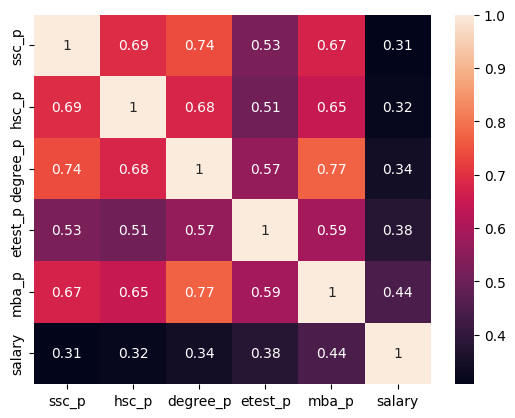

In [ ]:
# Plotting a heatmap
sn.heatmap(data = df.select_dtypes(exclude='object').corr(), annot=True)
plt.show()

**OBSERVATIONS:**
* There is a strong positive correlation between MBA and Salary (0.8).

* There is a moderate positive correlation between degree and salary (0.4).

* There is a weak positive correlation between SSC marks exam and salary (0.26).

* There is a weak positive correlation between HSC marks and salary (0.39).

* There is a weak positive correlation between Entrance test and salary (0.39).

**Genarating a boxplot:**

**WHAT IS A BOX PLOT?**
* A box plot, also known as a box-and-whisker plot, is a graphical representation of the distribution of a dataset. It displays several statistical measures such as the median, quartiles, and potential outliers in a concise and easy-to-understand manner.

**HOW DOES A BOX PLOT WORK?**
* ***Box:*** The box in the plot represents the interquartile range (IQR), which spans from the first quartile (Q1) to the third quartile (Q3). The line inside the box indicates the median value of the dataset.

* ***Whiskers***: The whiskers extend from the edges of the box to the minimum and maximum values of the dataset that are not considered outliers. The length of the whiskers can vary depending on how outliers are defined.

* ***Outliers:*** Individual data points that fall outside the whiskers are considered outliers and are plotted individually as points.

**WHY IS A BOX PLOT USED?**
* ***Visualizing Distribution:*** Box plots provide a clear visual summary of the distribution of a dataset, including measures of central tendency and spread.

* ***Identifying Outliers:*** They help in identifying potential outliers in the dataset, which may warrant further investigation.

* ***Comparing Distributions:*** Box plots make it easy to compare the distributions of multiple datasets or groups within a dataset.

**HOW TO INFER VALUES FROM A BOX PLOT?**
* ***Median:*** The line inside the box represents the median value of the dataset. It indicates the middle value when the dataset is ordered from smallest to largest.

* ***Quartiles:*** The edges of the box represent the first quartile (Q1) and the third quartile (Q3). These quartiles divide the dataset into four equal parts when ordered.

* ***Interquartile Range (IQR):*** The length of the box, known as the interquartile range, is the difference between Q3 and Q1. It contains the middle 50% of the data.

* ***Whiskers:*** The whiskers extend from the edges of the box to the minimum and maximum values of the dataset that are not considered outliers. The length of the whiskers can vary depending on the criteria used to define outliers.

* ***Outliers:*** Data points that fall outside the whiskers are considered outliers. They may represent unusual or extreme values in the dataset.

In [ ]:
# Check for outliers
Numerical_cols = df.select_dtypes(exclude='object')
Categorical_cols = df.select_dtypes(include = 'object')

**Segregating the numerical and categorical values by using keywords**

In [ ]:
# Displaying Numerical columns
Numerical_cols


,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
0,67.00,91.00,58.00,55.0,58.80,270000.000000
1,79.33,78.33,77.48,86.5,66.28,200000.000000
2,65.00,68.00,64.00,75.0,57.80,250000.000000
3,56.00,52.00,52.00,66.0,59.43,281059.210526
4,85.80,73.60,73.30,96.8,55.50,425000.000000
...,...,...,...,...,...,...
214,62.00,58.00,53.00,89.0,60.22,281059.210526
215,0.00,0.00,0.00,0.0,0.00,0.000000
216,0.00,0.00,0.00,0.0,0.00,0.000000
217,23.29,26.98,13.77,0.0,0.00,0.000000


In [ ]:
# Displying Categorical columns
Categorical_cols

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...
214,M,Central,Others,Science,Comm&Mgmt,No,Mkt&HR,Not Placed
215,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Not Placed
216,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Not Placed
217,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Not Placed


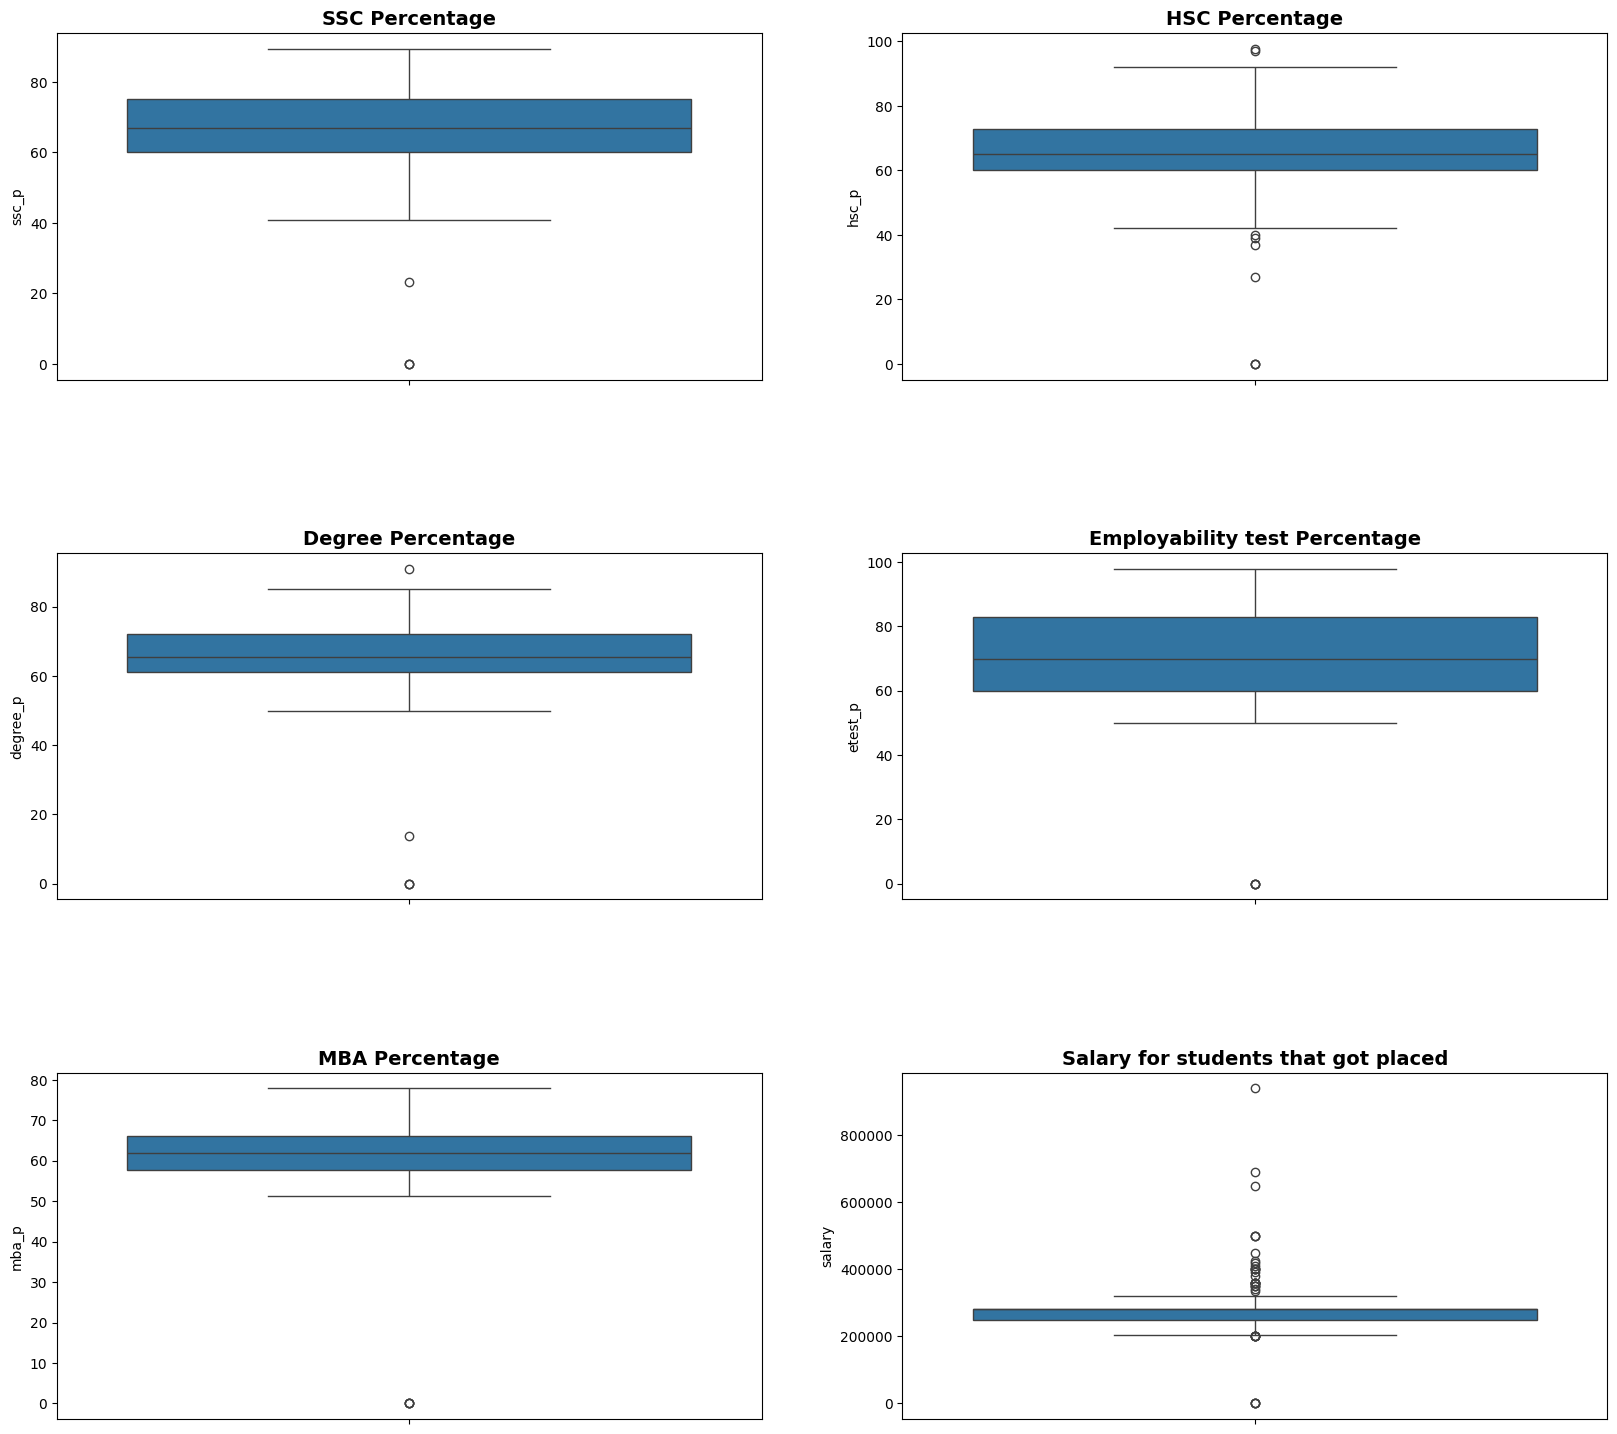

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20,18))
fig.subplots_adjust(hspace=0.5)
sn.boxplot(df['ssc_p'], ax=axes[0,0]).set_title('SSC Percentage', fontweight='bold', fontsize=14)
sn.boxplot(df['hsc_p'], ax=axes[0,1]).set_title('HSC Percentage',fontweight='bold',fontsize=14)
sn.boxplot(df['degree_p'], ax=axes[1,0]).set_title('Degree Percentage',fontweight='bold',fontsize=14)
sn.boxplot(df['etest_p'], ax=axes[1,1]).set_title('Employability test Percentage',fontweight='bold',fontsize=14)
sn.boxplot(df['mba_p'], ax=axes[2,0]).set_title('MBA Percentage',fontweight='bold',fontsize=14)
sn.boxplot(df['salary'], ax=axes[2,1]).set_title('Salary for students that got placed',fontweight='bold',fontsize=14)
plt.show()


Salary and HSC percentage have considerable amount of outliers. The rest all look normal with very few outliers in the front and the end.

**Generating a Histogram Plot:**



**WHAT IS A HISTOGRAM PLOT?**
* A histogram is another graphical representation commonly used to display the distribution of a dataset.

**HOW DOES A HISTOGRAM PLOT WORK?**
* ***Histogram Structure:*** A histogram consists of a series of adjacent rectangles, or bins, each representing a range of values. The width of each bin corresponds to the range of values it represents, and the height corresponds to the frequency or count of observations falling within that range.
* ***Visualizing Distribution:*** Histograms provide a visual representation of the distribution of data, showing how the data is spread across different value ranges. They help in understanding the shape, center, and spread of the dataset.
* ***Identifying Patterns:*** Histograms can reveal patterns such as skewness, symmetry, or multimodality in the data distribution, which are important characteristics for further analysis.
* ***Understanding Frequency:*** By examining the height of each bin, you can quickly determine the frequency or count of observations within specific value ranges. This helps in understanding the relative occurrence of different values in the dataset.

**HOW TO INFER VALUES FROM A HISTOGRAM PLOT?**
* ***Shape:*** The shape of the histogram can provide insights into the distribution of the data. It can be symmetric, skewed to the left (negatively skewed), or skewed to the right (positively skewed).
* ***Center:*** The center of the distribution can be estimated by identifying the peak or mode of the histogram, which represents the most frequently occurring value or range of values.
* ***Spread:*** The spread of the data can be assessed by observing the width of the distribution in the histogram. A wider distribution indicates greater variability in the data, while a narrower distribution suggests less variability.
* ***Outliers:*** Histograms can also help in identifying potential outliers by examining data points that fall far from the main bulk of the distribution.
* ***Bins:*** The choice of bin width can influence the appearance of the histogram. Adjusting the bin width can reveal different levels of detail in the data distribution.

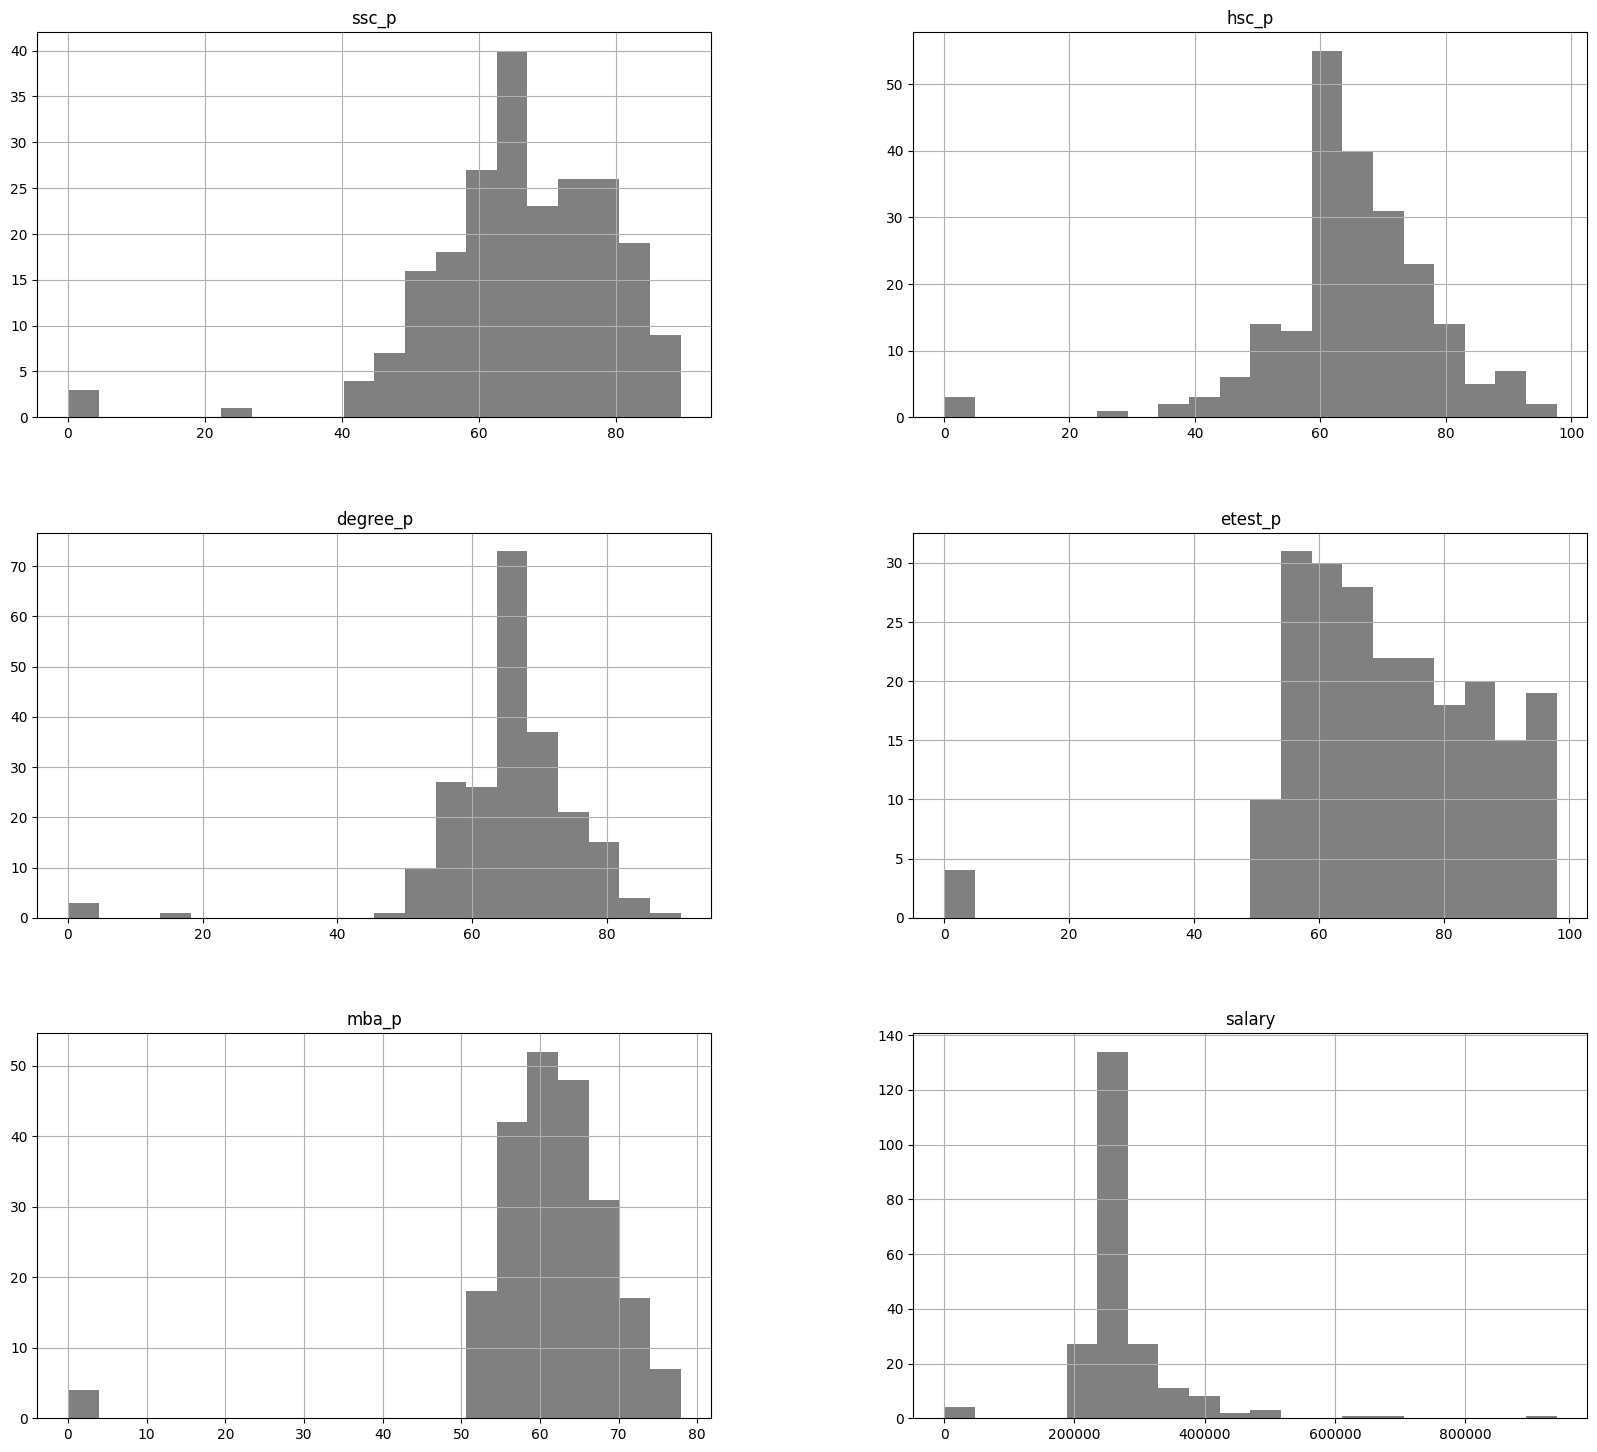

In [ ]:
# Plotting a histogram plot
df.hist(figsize=(20,18), bins=20, color='grey')
plt.show()

Almost all the parameters closely follow Normal distirbution

**Plotting a pairplot:**



**WHAT IS A PAIR PLOT?**
* A pairplot is a type of graphical display commonly used in exploratory data analysis (EDA) to visualize relationships between pairs of variables in a dataset. It's particularly useful when dealing with multivariate data, as it allows for the simultaneous examination of multiple variables.

**HOW DOES A PAIR PLOT WORK?**
* Structure: ***bold text*** A pairplot consists of a grid of scatterplots, with each scatterplot showing the relationship between two variables from the dataset. Along the diagonal of the grid, histograms or kernel density plots are typically displayed for each variable, showing the univariate distribution of each variable.
* ***Visualizing Relationships:*** Pairplots provide a comprehensive overview of the relationships between pairs of variables in the dataset. By examining the scatterplots, you can identify patterns such as linear relationships, non-linear relationships, clusters, or outliers.
* ***Identifying Correlations:*** Pairplots can help in identifying correlations between variables. Strong positive correlations are typically indicated by a tight cluster of points sloping upwards in the scatterplot, while strong negative correlations are indicated by a tight cluster sloping downwards.
* ***Detecting Trends:*** Pairplots allow you to detect trends and patterns that may not be immediately obvious when examining individual variables in isolation. For example, you can observe how one variable changes with respect to another variable across different ranges.
* ***Diagnosing Multicollinearity:*** Pairplots are useful for diagnosing multicollinearity, which occurs when two or more independent variables in a regression model are highly correlated. Multicollinearity can lead to unstable coefficient estimates and inflated standard errors, so identifying and addressing it is important in regression analysis.

**WHY IS A PAIR PLOT USED?**
* ***Scatterplots:*** In each scatterplot, the x-axis represents one variable, and the y-axis represents another variable. The points on the scatterplot represent individual data points from the dataset. The overall pattern of the points can provide insights into the relationship between the two variables.
* ***Diagonal Plots:*** Along the diagonal of the pairplot grid, histograms or kernel density plots are typically displayed for each variable. These plots show the distribution of each variable in the dataset, allowing you to assess its shape, center, and spread.
* ***Correlation:*** The strength and direction of the relationship between two variables can be assessed by examining the scatterplots. Strong positive correlations are indicated by a tight cluster of points sloping upwards, while strong negative correlations are indicated by a tight cluster sloping downwards.
* ***Multicollinearity:*** If you're using a pairplot for regression analysis, you can use it to identify potential issues with multicollinearity by examining the scatterplots for pairs of independent variables. Strong correlations between independent variables may indicate multicollinearity, which can affect the reliability of the regression model.

In [ ]:
# Adding the status variable in numerical format for better visualization (Dependent variable)
df['Status'] = df['status'].replace({'Placed': 1, 'Not Placed' : 0})

<Figure size 1200x1000 with 0 Axes>

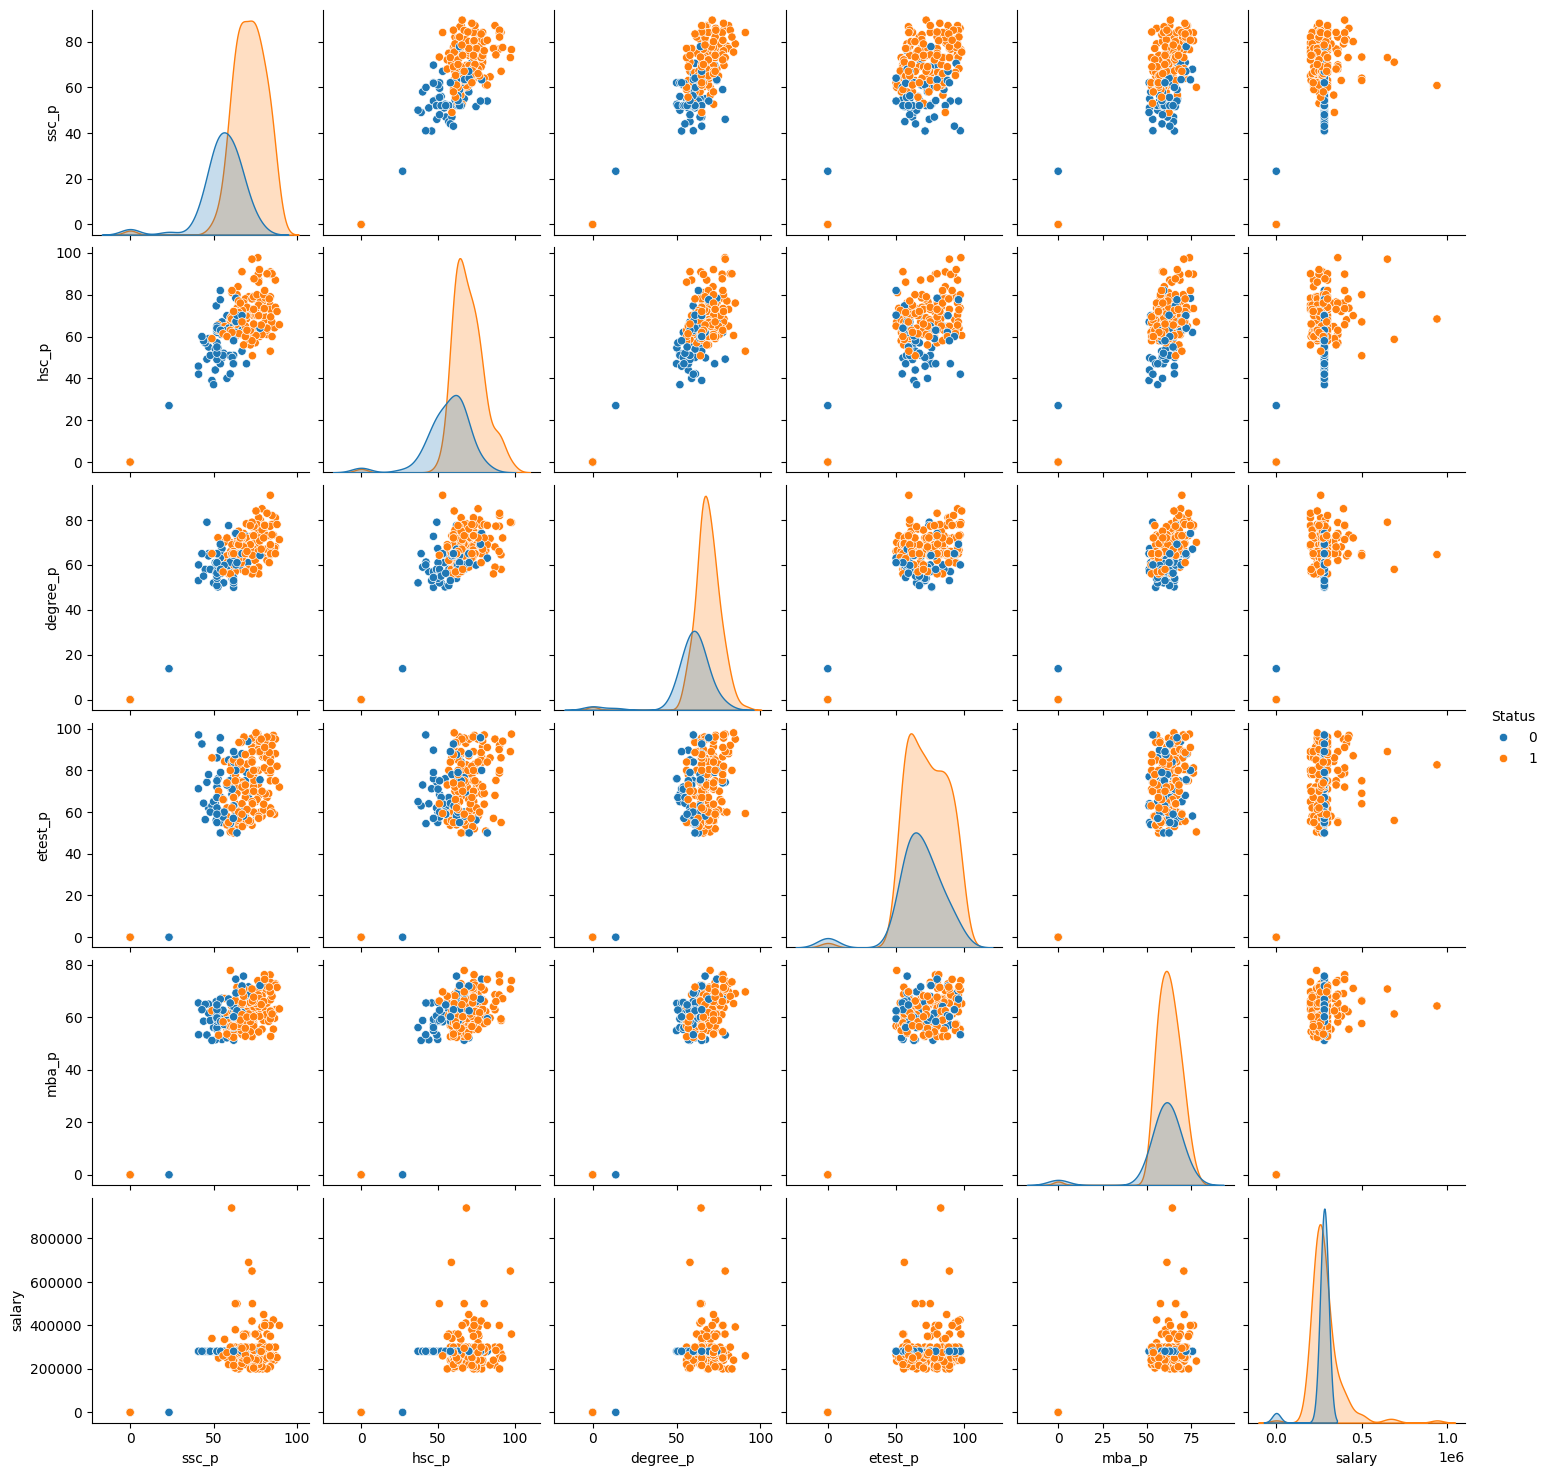

In [ ]:
# Plotting a pirplot
plt.figure(figsize=(12,10))
sn.pairplot(data=df, hue='Status')
plt.show()

Almost all the parameters closely follow Normal distirbution

**Plotting a pie chart for finding gender distribution:**


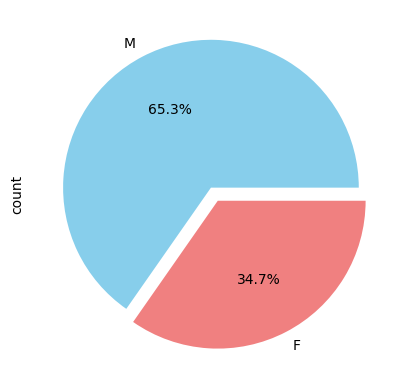

In [ ]:
#Gender distribution plot
df['gender'].value_counts().plot(kind='pie', autopct='%0.1f%%', explode=(0.05,0.05), colors=['skyblue','lightcoral'])
plt.show()


We can observe that 65.3% of the population are Male and 34.7% are female

**Plotting a count plot for finding placement results based on Gende**

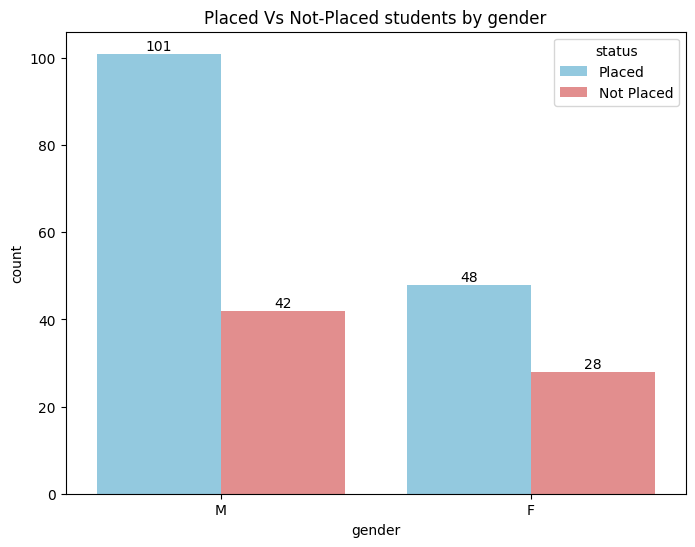

In [ ]:
#Plot setting
plt.figure(figsize=(8,6))

#Analytics part
ax = sn.countplot(data=df, x= df['gender'], hue=df['status'], palette=['skyblue','lightcoral'])
for i in ax.containers:
    ax.bar_label(i)
plt.title('Placed Vs Not-Placed students by gender')
plt.show()

From the above plot we can infer that more males are placed when comapared to females

**Plotting a count plot for finding placement results based on school boards and subjects**

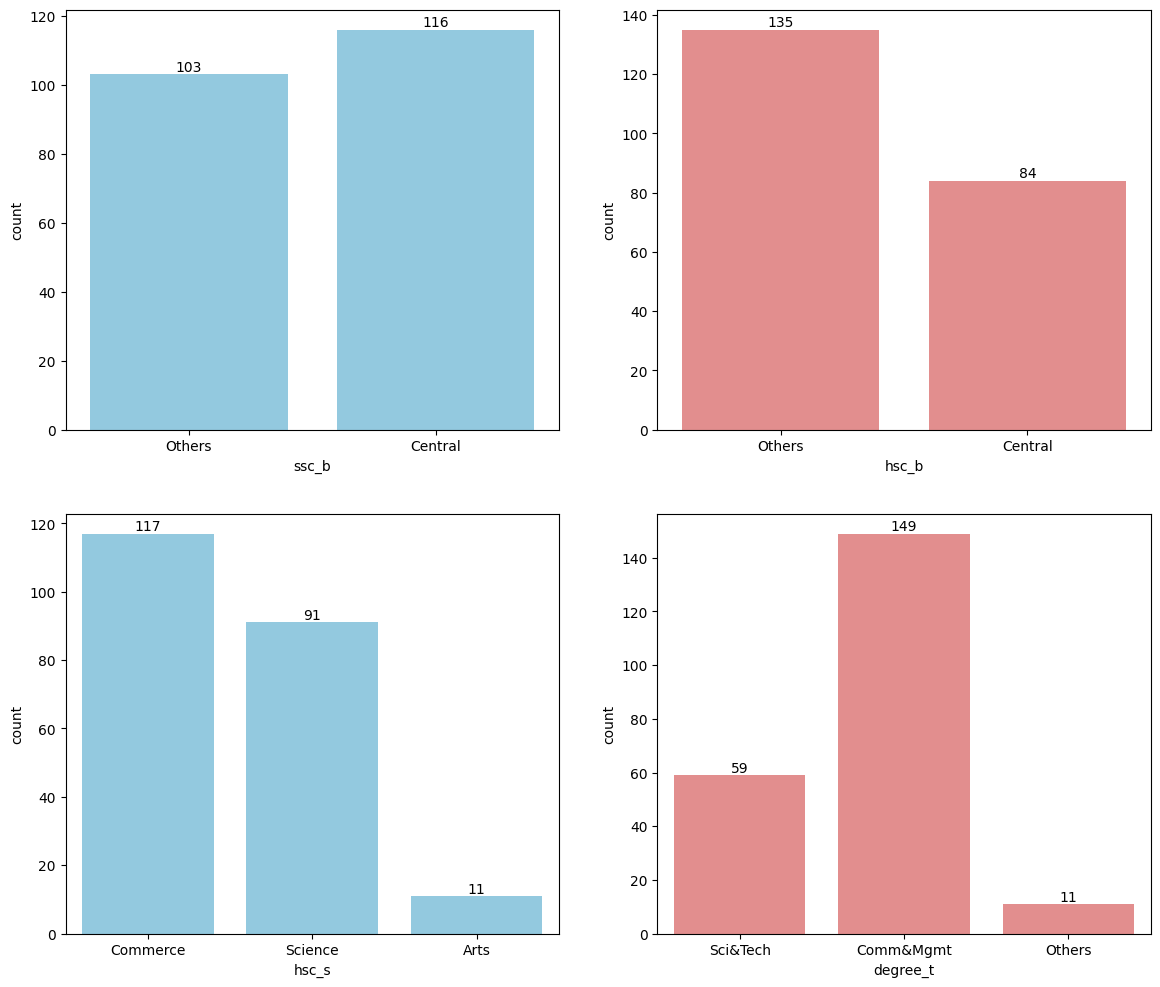

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))

ax = sn.countplot(x=df['ssc_b'], ax=axes[0, 0], color='skyblue')
for i in ax.containers:
    ax.bar_label(i)

ax1 = sn.countplot(x=df['hsc_b'], ax=axes[0, 1], color='lightcoral')
for i in ax1.containers:
    ax1.bar_label(i)

ax2 = sn.countplot(x=df['hsc_s'], ax=axes[1, 0], color='skyblue')
for i in ax2.containers:
    ax2.bar_label(i)

ax3 = sn.countplot(x=df['degree_t'], ax=axes[1, 1], color='lightcoral')
for i in ax3.containers:
    ax3.bar_label(i)

plt.show()

From the above graph, we can conclude that
* Most students studied ssc in central board
* Most students studies hsc in Other boards
* Most students pursued commerce in hsc
* Most students pursued commerce and management degree

**Plotting a pie chart for finding more popular specialization**

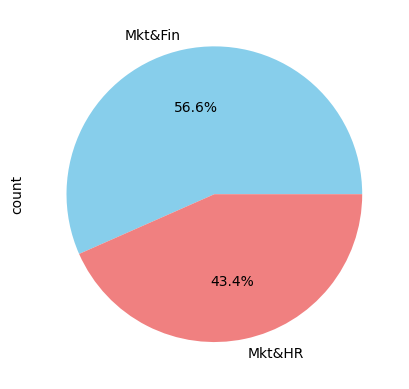

In [ ]:
# Plotting a pie chart
df['specialisation'].value_counts().plot(kind='pie', autopct='%0.1f%%', colors=['skyblue','lightcoral'])
plt.show()


Fronm the above chart, we can conclude that Marketing and Finance is more popular specialization

**Plotting a scatter plot to visualize the imapct of MBA percentage**

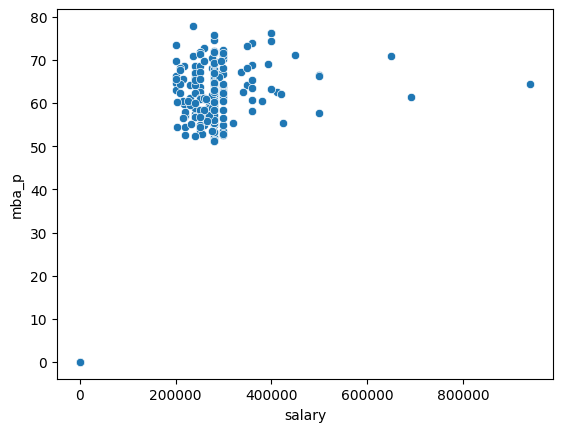

In [ ]:
sn.scatterplot(x=df['salary'],y=df['mba_p'])
plt.show()


From the above plot, we can infer that the MBA percentage does not make a great impact

**Plotting a countplot to find the relationship between Work Experience and
Placement Status**

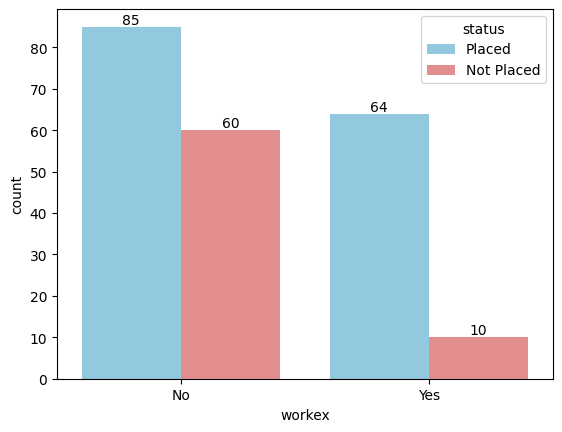

In [ ]:
# Plotting a count plot
ax = sn.countplot(x=df['workex'], hue=df['status'], palette=['skyblue','lightcoral'])
for i in ax.containers:
    ax.bar_label(i)

From the above plot we can infer that the ratio of people who have been placed with work experince is greater than those without work experience.

**Plotting a countplot to find the more popular specialisation**

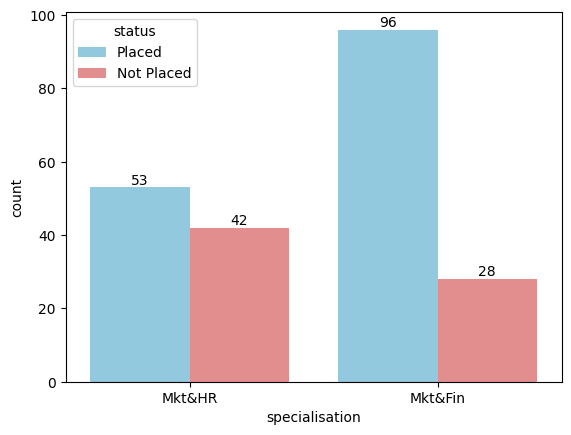

In [ ]:
ax = sn.countplot(x=df['specialisation'], hue=df['status'], palette=['skyblue','lightcoral'])
for i in ax.containers:
    ax.bar_label(i)

From the above graph, we can infer that Marketing and Finance is a more popular specialisation


**Finding the status of people placed in each specialisation**

In [ ]:
data = pd.crosstab(df['specialisation'], df['status'])
data['Total'] = data['Placed']+ data['Not Placed'] #Addition to the crosstab data
data['% of students placed in each specialisation'] = data['Placed']*100/data['Total'] #Calculating the total percentage of people placed
data

status,Not Placed,Placed,Total,% of students placed in each specialisation
specialisation,,,,
Mkt&Fin,28,96,124,77.419355
Mkt&HR,42,53,95,55.789474


From the above table, we can infer that the students in Marketing and HR are better placed.

**Statistical analysis structure of groupby statement where PK is degree-t and then the substructure is specialisation. The way it works, Indices are units whose values are supposed to be picked in a unit order and columns is the count where the value is embedded at.**

In [ ]:
# Statistical Analysis Structure
pd.crosstab(index=[df['degree_t'], df['specialisation']], columns=df['status'])


status                    Not Placed  Placed
degree_t  specialisation                    
Comm&Mgmt Mkt&Fin                 21      69
          Mkt&HR                  25      34
Others    Mkt&Fin                  2       2
          Mkt&HR                   4       3
Sci&Tech  Mkt&Fin                  5      25
          Mkt&HR                  13      16

From the above table, we can infer that the students in Commerce and Management with Marketing and Finance specialisation are better placed.

**Encoding categorical variables into numerical values**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['ssc_b'] = le.fit_transform(df['ssc_b'])
df['hsc_b'] = le.fit_transform(df['hsc_b'])
df['hsc_s'] = le.fit_transform(df['hsc_s'])
df['degree_t'] = le.fit_transform(df['degree_t'])
df['workex'] = le.fit_transform(df['workex'])
df['specialisation'] = le.fit_transform(df['specialisation'])

In [ ]:
# Dropping Salary column as the students who did not get placed have the salary value as Null.
#This will create bias while model building as it is representing similar information as the Target variable 'status'
new_df = df.drop(['salary','status'], axis=1)
new_df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,Status
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1


**Spliiting into test and train data**

In [ ]:
# Splitting data into Train and Test

from sklearn.model_selection import train_test_split
X = new_df.iloc[:,:-1]
y = new_df.iloc[:,-1]
X.head()



,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50


X is a set of independent variables except last column which is of interest ( Status)

Y is a set of dependent variables which is predicted by the predictor variables (Status)

**Displaying the first 5 rows of y**

In [ ]:
y.head()

0    1
1    1
2    1
3    0
4    1
Name: Status, dtype: int64

0 represents the entry of not being placed for the corresponding vector

1 represents the entry of being placed

**Handling case 1 and handling case 2 where we split the dataset into train and test_set.**

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=101)
x_train.shape, x_test.shape


((175, 12), (44, 12))

 We can clearly see that there is an imbalance in the data

**Building the logistic regression model**

In [ ]:
# Model Building
# Logistic Regression without Hyperparameter Tuning
from sklearn.linear_model import LogisticRegression
log_it = LogisticRegression(random_state=32) # Constructor invocation happens here and a random_state of 32 is set
log_it.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=32)

Initializing logistic object to Logistic regression and fitting the data x_train and y_train and constructing a logit object with a random state of 32

**Evaluating accuracy**

In [ ]:
# Evaluating on both train_ set as well as test_set accuracy
y_pred_train = log_it.predict(x_train)
y_pred_test = log_it.predict(x_test)


**Accuracy of test data**

In [ ]:
# Accuracy score of test-data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test,y_pred_test)


0.8181818181818182

We infer that the accuracy of test data is 81.8%

**Accuracy of train data**

In [ ]:
# Accuracy of the train_data
accuracy_score(y_train,y_pred_train)

0.8685714285714285

We infer that the accuracy of test data is 86.8%

**Evaluating the test data and generating a confusion matrix**

In [ ]:
# Evaluating Test data
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.80      0.71      0.75        17
           1       0.83      0.89      0.86        27

    accuracy                           0.82        44
   macro avg       0.81      0.80      0.80        44
weighted avg       0.82      0.82      0.82        44



In [ ]:
# Generating a confusion matrix
confusion_matrix(y_test,y_pred_test)

array([[12,  5],
       [ 3, 24]])

**Evaluating the train data and generating a confusion matrix**

In [ ]:
# Evaluating Train data
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.83      0.72      0.77        53
           1       0.88      0.93      0.91       122

    accuracy                           0.87       175
   macro avg       0.85      0.83      0.84       175
weighted avg       0.87      0.87      0.87       175



In [ ]:
# Generating a confusion matrix
confusion_matrix(y_train,y_pred_train)

array([[ 38,  15],
       [  8, 114]])

**Modely hypertuning**

In [ ]:
# Specifying the parameters that we want to Hypertune
from sklearn.model_selection import GridSearchCV

#At this step we use GridSearchCV to extract the best parameters which suits Logistic regression
parameters = {'penalty': ['l1','l2','elasticnet'], 'C': [1,2,3,5,10,20,30,50], 'max_iter': [100,200,300]}

**Extracting best parameters using GridSearchCV**

In [ ]:
log_it_grid = GridSearchCV(log_it, param_grid=parameters, scoring = 'accuracy', cv=10)
log_it_grid.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=32),
             param_grid={'C': [1, 2, 3, 5, 10, 20, 30, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [ ]:
print(log_it_grid.best_params_)

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}


**Printing the test and train accuracy again, after hyperparameter tuning**

Steps followed here:

1) Use the existing logit model and feed that model into the GridSearchCV package with the parametric set

2) Now compute the testing accuracy and training accuracy


In [ ]:
# Accuracy score of test data
y_pred_grid_test = log_it_grid.predict(x_test)
y_pred_grid_train = log_it_grid.predict(x_train)
accuracy_score(y_test,y_pred_grid_test)


0.8181818181818182

In [ ]:
# Accuracy score of train data
accuracy_score(y_pred_grid_train,y_train)


0.8685714285714285

**Reciever operating curve :**

 It is a measure of the tradeoff between the true positive rate(TPR) and the false positive rate(FPR) which helps us to evaluate the binary classification model

In [ ]:
# Evaluating a binary classification model
from sklearn.metrics import roc_auc_score, roc_curve
roc_auc_score(y_test,y_pred_test)

0.7973856209150326

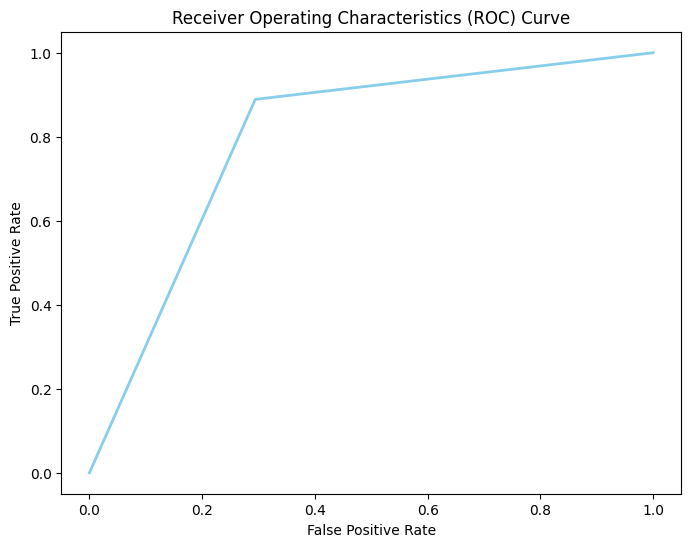

In [ ]:
# Plotting the ROC curve
fpr, tpr, thresholds = roc_curve(y_test,y_pred_test)
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr, color='skyblue', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics (ROC) Curve')
plt.show()

Here AUC (Area under the curve) represents the degree of seperatibility between the predictor variables and the dependant variable,.

So more the area(here it is around 84%) more is the distinguishing capacity for the model to seperate out between target class and predictor variables

In [ ]:
import pickle

In [ ]:
# # Model to be Saved is called log_it
# filename = 'D:/DS-Nick-brown/Final-Project/trained_model.sav'
# #This is the file_name where the model is saved
# pickle.dump(log_it_grid,open(filename,'wb'))

#------------------------Please uncomment this section in case of dump requirement--------------------------------------#


**We are declaring a filename variable where we store the saved model. Triggering this script over and over again will rewrite the saved model file in case of an automation scenario. Then we go ahead and dump the model onto the location.**

In [ ]:
# x_train.head(30)

**Placement Predictions**

In [ ]:
# input_data = (1,65.00,1,25,1,1,60,2,0,57.00,0,59.00)

# input_numpy = np.asarray(input_data)

# input_numpy = input_numpy.reshape(1,-1)

# #Reading the saved model

# loaded_model = pickle.load(open('D:/DS-Nick-brown/Final-Project/trained_model.sav','rb'))

# prediction = loaded_model.predict(input_numpy)

# if prediction[0]==0:
#     print("You will not be placed")
# else:
#     print("You will be placed")

#-------------------------------------------Uncomment this section for dump requirement------------------------#

**This is a complete software what the user is looking at in a serial scenario.**

**NOTE:**

**Specifications to be taken into consideration while using streamlit application**

1) When the user enters his value for prediction the structure the vector has to take is that of x_train

2) While contributing to the work the sl.no in the dataset remains constant and rest all get's added as it (csv format case Sensitive) is for dynamic analytics

3) Integrate with streamlit

**REFERENCES:**

1) https://www.kaggle.com/code/ishikakumari0/campus-recruitment-eda

2) https://www.kaggle.com/code/smriti31/placement-analysis-modeling

3) https://www.kaggle.com/code/shwetadevkhile/placementpredictor

4) Exploratory data analysis using python https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python/notebook#1.-So...-What-can-we-expect?

5) Analysis of the abalone's dataset https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/ML_Data_Cleaning_and_Feature_Selection/ML_Data_Cleaning_and_Feature_Selection_Abalone.ipynb

6) Analysis by Latif Ertekin( The owner of the dataset) https://www.kaggle.com/code/latifertekin/lr-random-forest#Data-cleaning-and-transformation

7) Analysis of AUTOML notebooks by Prof Nick Brown https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/CC_Kaggle_AutoML_Regression_Melbourne_Housing.ipynb

**MIT LICENSE:**

Copyright (c) 2024 karthiks061992
Copyright (c) 2024 lakshmi14k

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.